In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# initialize the map and image size
n = 10
# map is the environment setting where the agent will walk in, with the size of a square n*n
# image is used to visualize the map, different color denotes different rewards, they can be positive or negative

map = np.zeros((n, n))
image = np.zeros((n, n, 3))
l = list(range(n * n))

In [3]:
# define a function to set a reward value for the whole map
# use gaussian noise to simulate the reward,
# which is quite natural because fewer location will have extreme positive or negative values
def generate_reward(n, seed=0, mean=0, sigma=10):
    # set the random seed to ensure the experiment is repeatable
    np.random.seed(seed)
    return np.random.normal(loc=mean, scale=sigma, size=(n, n))


map += generate_reward(n, seed=0, mean=0, sigma=30)
reward_max = map.max()
reward_min = map.min()

# the starting point is (0,0), and the terminal point is (5,9)
map[0][0] = 0
map[5][9] = 10000
print(map)

[[ 0.00000000e+00  1.20047163e+01  2.93621395e+01  6.72267960e+01
   5.60267397e+01 -2.93183364e+01  2.85026525e+01 -4.54071625e+00
  -3.09656555e+00  1.23179551e+01]
 [ 4.32130713e+00  4.36282052e+01  2.28311318e+01  3.65025049e+00
   1.33158970e+01  1.00102298e+01  4.48223722e+01 -6.15474791e+00
   9.39203105e+00 -2.56228722e+01]
 [-7.65896945e+01  1.96085579e+01  2.59330860e+01 -2.22649506e+01
   6.80926387e+01 -4.36309702e+01  1.37275552e+00 -5.61551550e+00
   4.59833764e+01  4.40807631e+01]
 [ 4.64842277e+00  1.13448756e+01 -2.66335724e+01 -5.94238940e+01
  -1.04373645e+01  4.69046907e+00  3.69087204e+01  3.60713955e+01
  -1.16198045e+01 -9.06908252e+00]
 [-3.14565890e+01 -4.26005381e+01 -5.11881057e+01  5.85232619e+01
  -1.52895655e+01 -1.31422290e+01 -3.75838608e+01  2.33247107e+01
  -4.84169354e+01 -6.38220841e+00]
 [-2.68639968e+01  1.16070749e+01 -1.53241541e+01 -3.54189655e+01
  -8.45466850e-01  1.28499561e+01  1.99551667e+00  9.07415693e+00
  -1.90296628e+01  1.00000000e+04

In [4]:
# visualize the map
# blue color denotes positive reward, the darker the blue color is, the larger the reward is
# red color denotes negative reward, the darker the red color is, the smaller the reward is

for i in range(100):
    # get the x and y coordinate of the node
    x = i // 10
    y = i % 10
    # set the color of the initial node as yellow
    if (x == 0 and y == 0):
        image[x][y][0] = 1
        image[x][y][1] = 1
        image[x][y][2] = 0
    # set the color of the terminal node as black
    elif (x == 5 and y == 9):
        image[x][y][0] = 0
        image[x][y][1] = 0
        image[x][y][2] = 0
    # set the color of the nodes with positive reward
    elif map[x][y] > 0:
        image[x][y][0] = 1 - map[x][y] / reward_max
        image[x][y][1] = 1 - map[x][y] / reward_max
        image[x][y][2] = 1
    # set the color of nodes with negative reward
    elif map[x][y] < 0:
        image[x][y][0] = 1
        image[x][y][1] = 1 - map[x][y] / reward_min
        image[x][y][2] = 1 - map[x][y] / reward_min


In [5]:
# define a function to compute the reward corresponding to a route
# the route is given
def compute_reward(route, gamma=0.95):
    t = 0
    reward_sum = 0
    # (i,j) is the coordinate in the map
    # the corresponding value restored in the map is in map[j][i]
    # for example, the node (5,0) is stored as the first row of the map, and the fifth value of the map
    for i, j in route:
        if map[i][j] > 0:
            map_val = map[i][j] * gamma ** t
        else:
            map_val = map[i][j]
        t += 1
        print(map_val)
        reward_sum += map_val
    return reward_sum


# define a function to draw the route, given all the nodes to pass by
def draw_route(img, node_li, title=None):
    x_li = []
    y_li = []
    for x, y in node_li:
        x_li.append(x)
        y_li.append(y)
    x_coor = np.array(x_li)
    y_coor = np.array(y_li)

    plt.imshow(img)
    plt.plot(y_coor, x_coor, color="r")
    plt.title(title)
    plt.show()

0.0
11.404480438465864
26.49933091966289
57.63857419996049
45.6341296564376
10.303587250666082
7.358438764877248
31.30113420297415
0.910714058498201
23.261699259550007
21.59727691389249
13.267097584237437
4.90331223534457
-19.029662810428906
4876.7497911552955
5111.799903829434


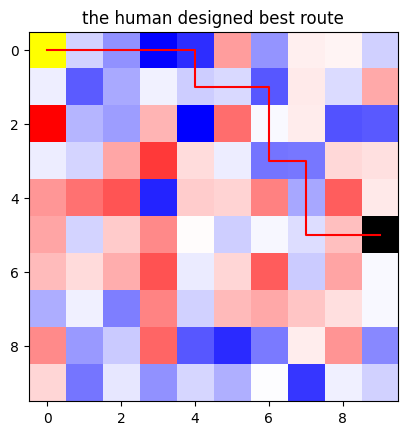

In [6]:
# give the best route designed and initialize it
# best_route = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (5, 1),
#               (6, 1), (6, 2), (6, 3), (7, 3), (7, 4), (7, 5), (8, 5), (9, 5)]
best_route = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5),
              (1, 6), (2, 6), (3, 6), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9)]
# get the reward of the route
print(compute_reward(best_route, gamma=0.95))
# visualize the route
draw_route(image, best_route, "the human designed best route")

In [7]:
# check whether a node is in the map, n is the length of map
def in_range_map(n, x, y):
    if (0 <= x <= n - 1 and 0 <= y <= n - 1):
        return True
    else:
        return False


# define a function to get the next state, given current state and the action
def get_next_state(current_state, action):
    new_state = tuple(sum(x) for x in zip(current_state, action))
    return new_state

def get_route(Q_table, x=0,y=0,t_init=10000):
    route = []
    action_alternative = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # initialize the starting point, we always start from 5,9

    route.append((x, y))
    t = t_init
    while not (x == 5 and y == 9) and t <= t_init:
        # find out the best action according to the Q_table
        action = action_alternative[np.argmax(Q_table[x][y])]
        x, y = get_next_state((x, y), action)
        # print(x, y)
        route.append((x,y))
    return route


In [8]:
def Q_learning_train(n, gamma=0.95, alpha=0.1, epsilon=0.9, episode_num=1000, t_terminal=1000):
    # initialize the action list
    action_alternative = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    # initialize the Q value table
    Q_table = np.zeros((n, n, len(action_alternative)))
    for episode in range(episode_num):
        print(episode)
        # initialize the state, we always start from (0,0)
        x = random.randint(0,9)
        y = random.randint(0,9)
        # in each single episode
        t = 0
        while not (x == 5 and y == 9) and t <= t_terminal:
            t += 1
            # identify the current state
            state = (x, y)
            # select the action
            # with the probability of epsilon to select the best action with highest Q value
            # with the probability of 1-epsilon to select a random action
            rand_num = np.random.random()

            if rand_num < epsilon:
                # print(x, y)
                action_id = np.argmax(Q_table[x, y])
                action = action_alternative[action_id]
                # print(action,"arg")
            else:
                action = random.choice(action_alternative)
                # print(action,"rand")
            # invalid action
            new_x, new_y = get_next_state(state, action)
            if not in_range_map(n, new_x, new_y):
                continue


            # valid action, update the Q table
            else:
                # evaluate the action
                new_state = get_next_state(state, action)
                prev_x, prev_y = x, y
                x, y = new_state
                previous_Q_val = Q_table[prev_x][prev_y][action_alternative.index(action)]
                # compute the reward
                reward = map[x][y]
                # compute temporal difference for that action
                temporal_difference = reward + gamma * np.max(Q_table[x][y]) - previous_Q_val
                # learn from this temporal difference according to its learning rate alpha
                new_Q_val = previous_Q_val + alpha * temporal_difference
                # update the Q table for the previous state and action
                Q_table[prev_x][prev_y][action_alternative.index(action)] = new_Q_val
    return Q_table


In [11]:
# train to get the Q table, use default arguments
obtained_Q_table = Q_learning_train(n,episode_num=1000)
print(obtained_Q_table)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
# utilize the trained Q table to get the route
obtained_route = get_route(obtained_Q_table)
print(obtained_route)
draw_route(image,obtained_route,"route without human feedback")
# print(compute_reward(obtained_route,0.95))
# without human feedback, it fails, because the agent will be limited to the high reward if it simply keeps walking
# between (0,3), and (0,4)
# It is hard to overcome that and explores the much larger reward on (5,9)
# (This is due to the limitation of common RL)

In [ ]:
print(obtained_Q_table)
print(obtained_route)
draw_route(image,obtained_route,"image X")
print(compute_reward(obtained_route,gamma=0.95))

NameError: name 'obtained_Q_table' is not defined

[(1, 6), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9)]


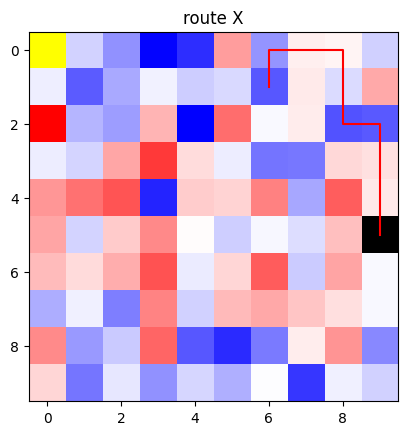

In [15]:
# apply human feedback to enhance the training performance
## give a better route which is similar to the trained route
# when the agent was stuck between (0,3) and (0,4) for more than 10 times,
# I keep all of its trained route before that and keep (0,3), (0,4) only once,
# and point out that you should go down once, and go right twice
partial_route_trained = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
guided_route = [(1, 4), (1, 5), (1, 6)]
# then the initial state for it to be trained will be at (1,6)
route_trained_2=get_route(obtained_Q_table,x=1,y=6)
print(route_trained_2)
draw_route(image, route_trained_2, "route X")

